In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
import sqlite3 as sq
from functools import reduce
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import sys
sys.path.append("../../Functions and Dictionaries/") # Adds higher directory to python modules path
import geodict
namestocommon = geodict.namestocommon

In [2]:
import vizfunctions2
prettypercentchange = vizfunctions2.prettypercentchange #single viz per x axis unit datalabels, active inputs: xoffset, yoffset, labelformat
percentchange = vizfunctions2.percentchange #double viz per x axis unit datalabels, active inputs: xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size
percent = vizfunctions2.percent
percentchange = vizfunctions2.percentchange
realchange = vizfunctions2.realchange

In [3]:
import changefunctions
calculate_changes = changefunctions.calculate_changes
generate_time_frames = changefunctions.generate_time_frames

In [4]:
import vizfunctions
#allheaders = vizfunctions.allheaders
#howwide = vizfunctions.howwide
tablecolors = vizfunctions.tablecolors
#allheadersmerged = vizfunctions.allheadersmerged
#makeinvisible = vizfunctions.makeinvisible
mergecells = vizfunctions.mergecells
mergemultcells = vizfunctions.mergemultcells

In [5]:
#data labels functions
def singledatalabels(xoffset, yoffset, labelformat, n, start_idx=0):
    for idx, (j, k) in enumerate(zip(x, y)):
        if idx >= start_idx and (idx - start_idx) % n == 0:
            label = labelformat.format(k)
            plt.annotate(label, (j, k), textcoords='offset points', xytext=(xoffset, yoffset), ha='center')
boxstyleinput = "round,pad=-0.060,rounding_size=0.15"
def roundedboxes(boxstyleinput):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),abs(bb.width), abs(bb.height),boxstyle=boxstyleinput, ec="none", fc=color, mutation_aspect=1)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
def howwide(width):
    ['None' for x in range(width)]
def howlong(indexlength):
    ["None" for x in range(indexlength)]
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheadersmerged(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in doublecols:
            cell.set_edgecolor(col1)
        elif cell_text in column_headers:
            cell.set_edgecolor(None)
        else:
            cell.set(edgecolor=col2)
        if cell_text in column_headers:
            cell.visible_edges = 'B'
        elif cell_text in row_headers:
            cell.visible_edges = edge2
        elif cell_text in col_names:
            cell.visible_edges = 'LR'
        if cell_text in row_headers\
        or cell_text in doublecols:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#function to make figure invisible for tables
guy1, guy2, guy3 = False, 'off', 'tight'
def makeinvisible(guy1, guy2, guy3):
    return fig.patch.set_visible(guy1), ax.axis(guy2), ax.axis(guy3)
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheaders(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in column_headers:
            cell.set_edgecolor(col1)
        else:
            cell.set(edgecolor=col2)
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in column_headers:
            cell.visible_edges = edge1
        elif cell_text in row_headers:
            cell.visible_edges = edge2
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in row_headers\
        or cell_text in column_headers:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#stacked bar labels function
belowstackedbarlabels, abovestackedbarlabels = -5, 2
def stackedbarlabels(locationoffset):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + locationoffset, str(float(round(bar.get_height(), 1))) + '%', ha='center')
def doubledatalabels(xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size):
    for j, k in zip(xpos, y1):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset1, yoffset1), fontsize = size, ha = 'center')
    for j, k in zip(xpos, y2):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset2, yoffset2), fontsize = size, ha = 'center')

In [6]:
#Set branding parameters
GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY= '#00263E', '#6DB0C7', '#EB7525', '#7B7E85'
C1, C2, C3, C4, C5, C6, C7, C8, C9 = '#314454', '#597952', '#66a141', '#0f2e39', '#dcdedf', '#797e80', '#535455', '#30523b', '#8494a4'
TABLECOL1, TABLECOL2 = '#E1EFF2', '#F4F9F9'
GNRCFONTONE, GNRCFONTTWO, GNRCFONTTHREE = 'Calibri', 'DIN Condensed', 'Palatino Linotype'
SMALLER_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE, BIGGEST_SIZE = 10, 11, 13, 18, 20
#Update the default style sheet using rcparams
plt.rcParams.update({'font.size': SMALL_SIZE, 'font.weight': 'normal', 'axes.titlesize': BIGGER_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'xtick.labelsize': SMALL_SIZE, 
'ytick.labelsize': SMALL_SIZE, 'legend.fontsize': SMALL_SIZE, 'font.family': GNRCFONTONE, 'axes.facecolor': 'None', 'figure.figsize': (10, 5), 
'figure.facecolor': 'None', 'figure.edgecolor': 'None', 'figure.autolayout': True, 'figure.dpi': 500, 'axes.grid': False, 'axes.grid.which': 'major', 
'axes.axisbelow': True, 'text.color': GNRCDARKBLUE, 'axes.labelcolor': GNRCDARKBLUE, 'xtick.color': GNRCCOOLGRAY, 'ytick.color': GNRCCOOLGRAY, 
'axes.labelpad': 15, 'axes.titlepad': 20, 'grid.color': GNRCCOOLGRAY, 'grid.linestyle': '-', 'grid.alpha': '0.7', 'lines.linewidth': 1.5, 
'lines.linestyle': '-', 'lines.marker': 'o', 'legend.framealpha': 0.8, 'legend.facecolor': 'inherit', 'legend.frameon': False,
'axes.prop_cycle': cycler(color = [C1, C2, C3, C4, C5, C6, C7, C8, C9, GNRCLIGHTBLUE]), 
'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False, 'xtick.major.size': 8, 
'xtick.minor.size': 4, 'ytick.major.size': 6, 'ytick.minor.size': 3, 'ytick.minor.size': 3})
#Settings not available in rcparams
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
linealpha = 0.8                             #no rcparam, set this as alpha for line plots
#AXIS LABEL FORMATTERS
yearformat = '{x:.0f}'                       #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
numberonedecimalformat = '{x:,.1f}'          #takes float datatype to a number with one decimal with commas at the thousandth
numbertwodecimalformat = '{x:,.2f}'          #takes float datatype to a number with two decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
percentnodecimalformat = '{x:,.0f}%'         #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
moneyformat = '${x:,.0f}'                    #takes float datatype to a number with no decimal with commas at the thousandth and a MONEY sign   

In [7]:
#Unincorporated and Incorporated so different where it's offered so just listing geos every time
#['Rutherford Unincorporated', 'Rutherford County', 'Tennessee', 'GNRC', 'Eagleville', 'La Vergne', 'Murfreesboro', 'Nolensville', 'Smyrna']
unincorporated = 'Wilson Unincorporated'
county = 'Wilson County'
region = 'GNRC'
state = 'Tennessee'

In [112]:
conn = sq.connect('../../Pipeline-Woods-and-Poole/Outputs/WP.db')
sql_query = pd.read_sql('SELECT * FROM [PopStats_23B_CM_Adj]', conn)
data = pd.DataFrame(sql_query)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
geos = ['Wilson County', 'GNRC']#, 'Lebanon', 'Mount Juliet', 'Watertown', 'Wilson Unincorporated']
data = data[geos]
data = data.transpose().reset_index(drop = False)
projectedpopandhh = data[['NAME', 'Year', 'Time Frame', 'POP', 'POP % Change', 'POP Change']]
changedict = {'POP': 'Population', 'POP % Change': 'Population % Change', 'POP Change': 'Population Change'}
projectedpopandhh = projectedpopandhh.rename(columns = changedict)
projectedpopandhh['Year'] = projectedpopandhh['Year'].replace({'None': 0})
projectedpopandhh['Year'] = projectedpopandhh['Year'].astype(float)
projectedpopandhh.head()

,NAME,Year,Time Frame,Population,Population % Change,Population Change
0,Wilson County,2023.0,None,163674.0,NaN,NaN
1,Wilson County,2024.0,None,166335.259259,NaN,NaN
2,Wilson County,2025.0,None,169020.518519,NaN,NaN
3,Wilson County,2026.0,None,171723.777778,NaN,NaN
4,Wilson County,2027.0,None,174443.037037,NaN,NaN


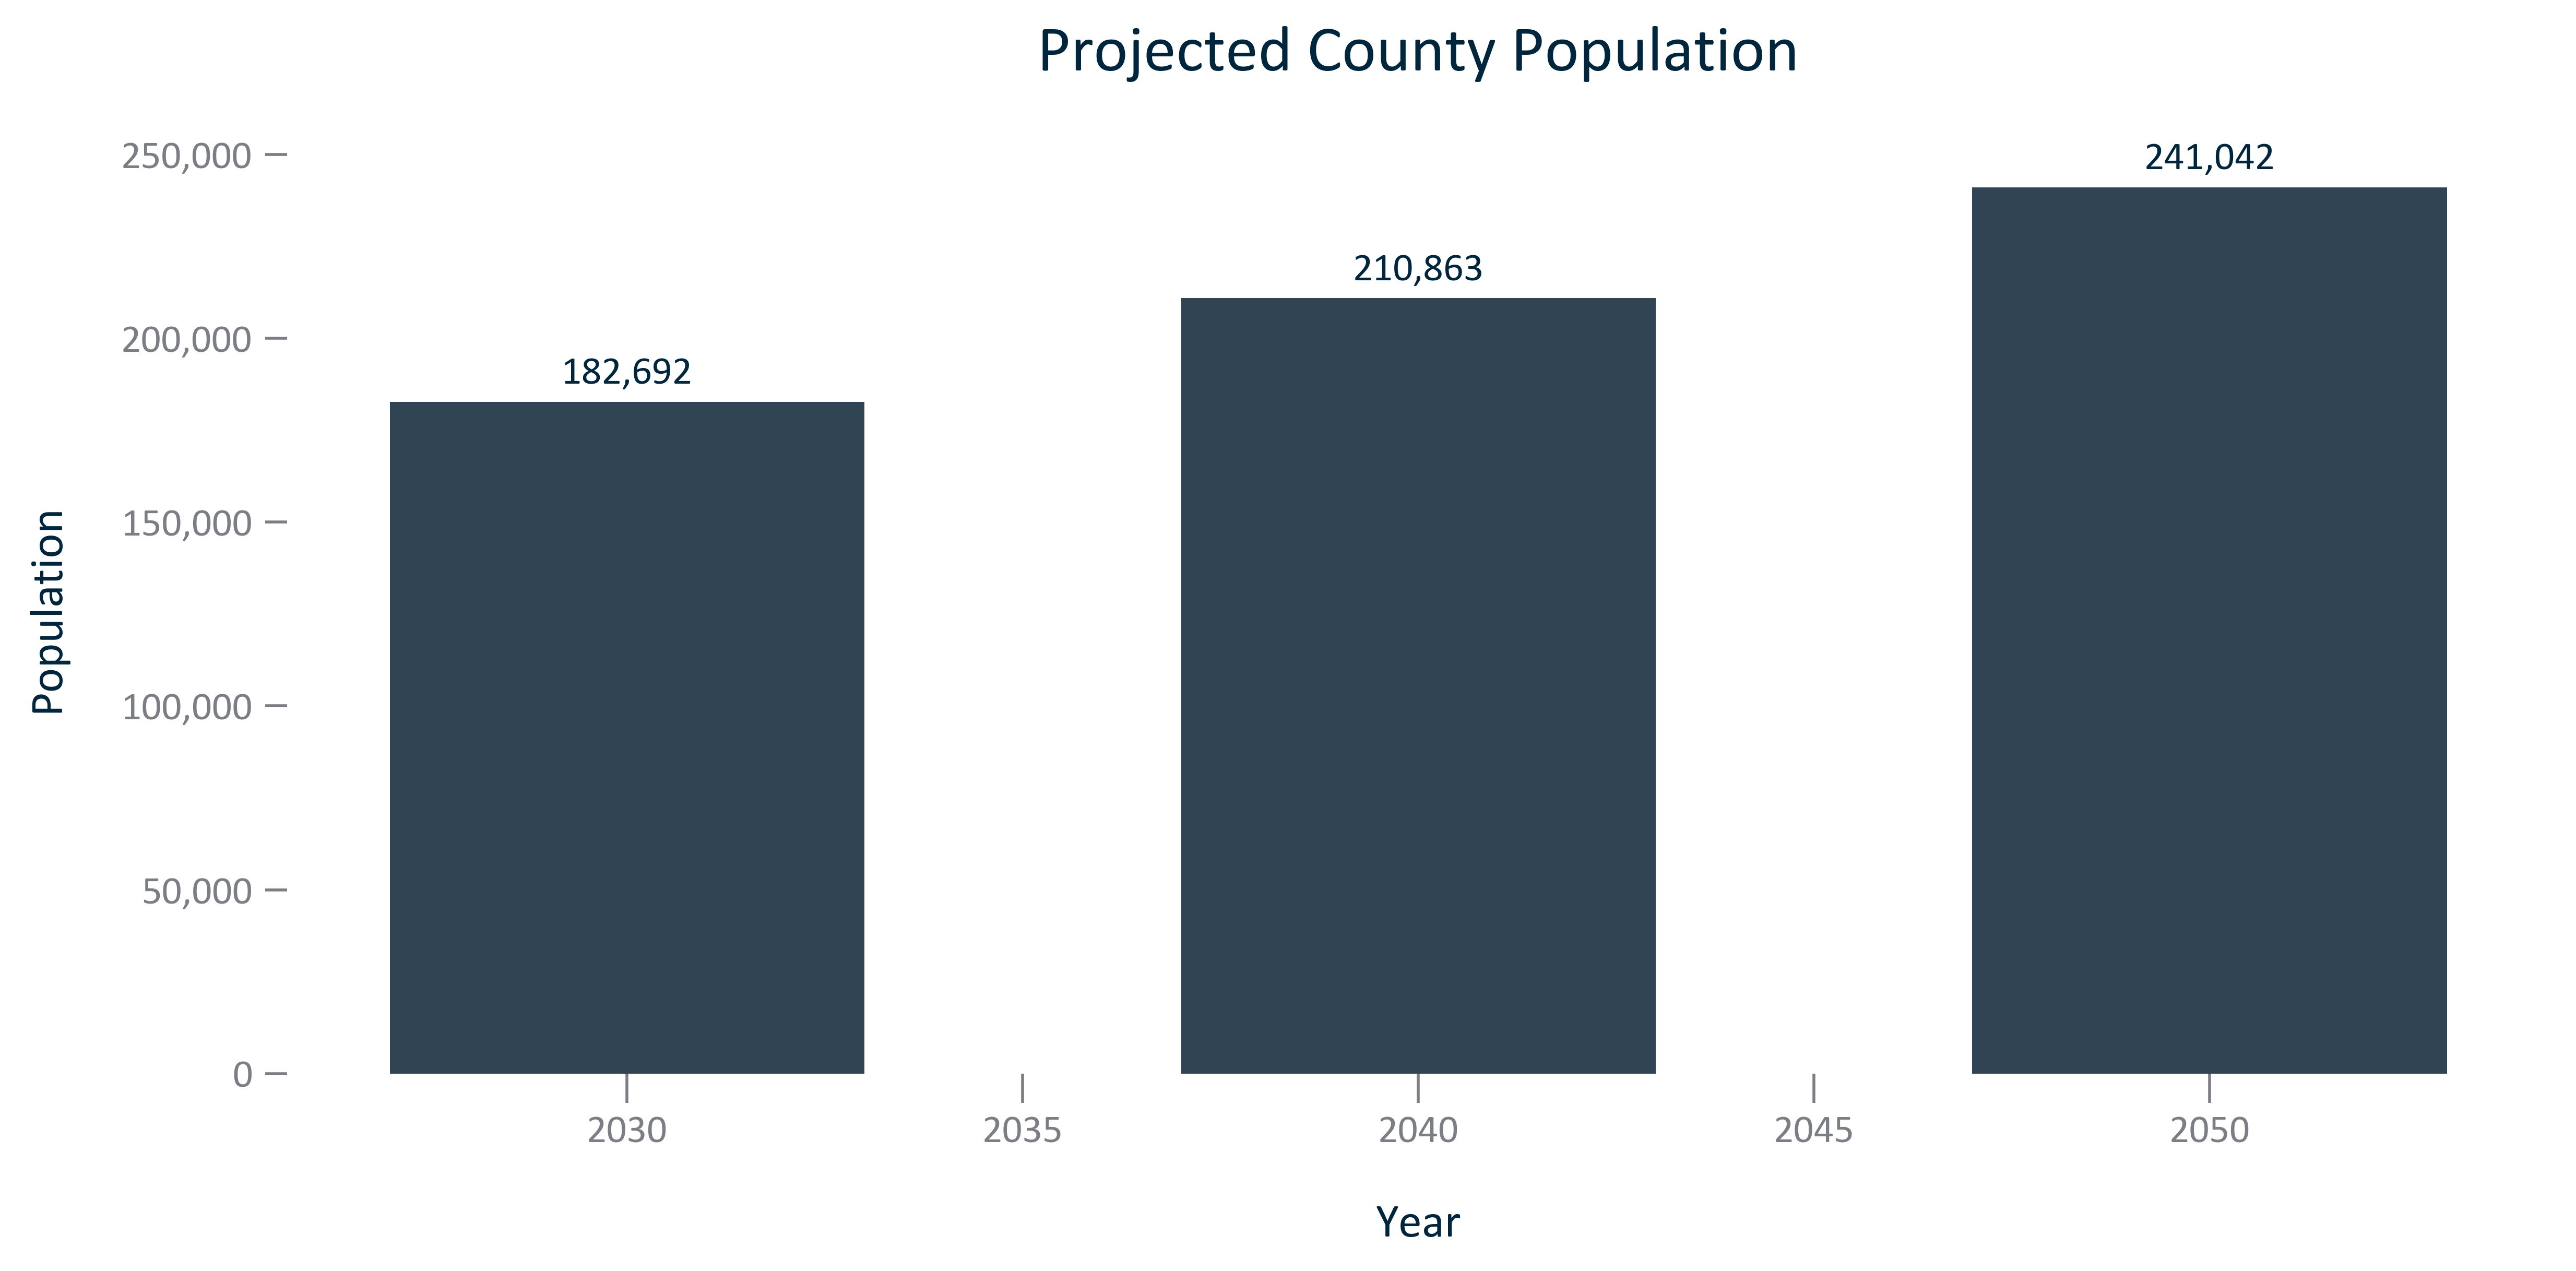

In [113]:
#this is county now because sub-county geographies aren't available yet
title = 'Projected County Population' #Unincorporated
thelist = [2030.0, 2040.0, 2050.0]
df_temp = projectedpopandhh[['NAME', 'Year', 'Population']]
df_temp = projectedpopandhh.loc[(projectedpopandhh['NAME'] == county)&
                           (projectedpopandhh['Year'].isin(thelist))&(projectedpopandhh['Population'].notnull())]
xinput = 'Year'
yinput = 'Population'
xlabel = xinput
ylabel = 'Population'
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y, width = 6) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
labels = ['2025', '2035', '2045']
#plt.xticks(x, labels)
#data labels
singledatalabels(0, 5, "{:,.0f}", n = 1, start_idx = 0)
#display and save
fig.savefig('../Figures/POP_bar_primarygeo_projectedpopulation_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_bar_primarygeo_projectedpopulation_overtime.png', bbox_inches='tight')
with open('../Figures/POP_bar_primarygeo_projectedpopulation_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Woods and Poole Population Projections')
plt.show()
plt.close();

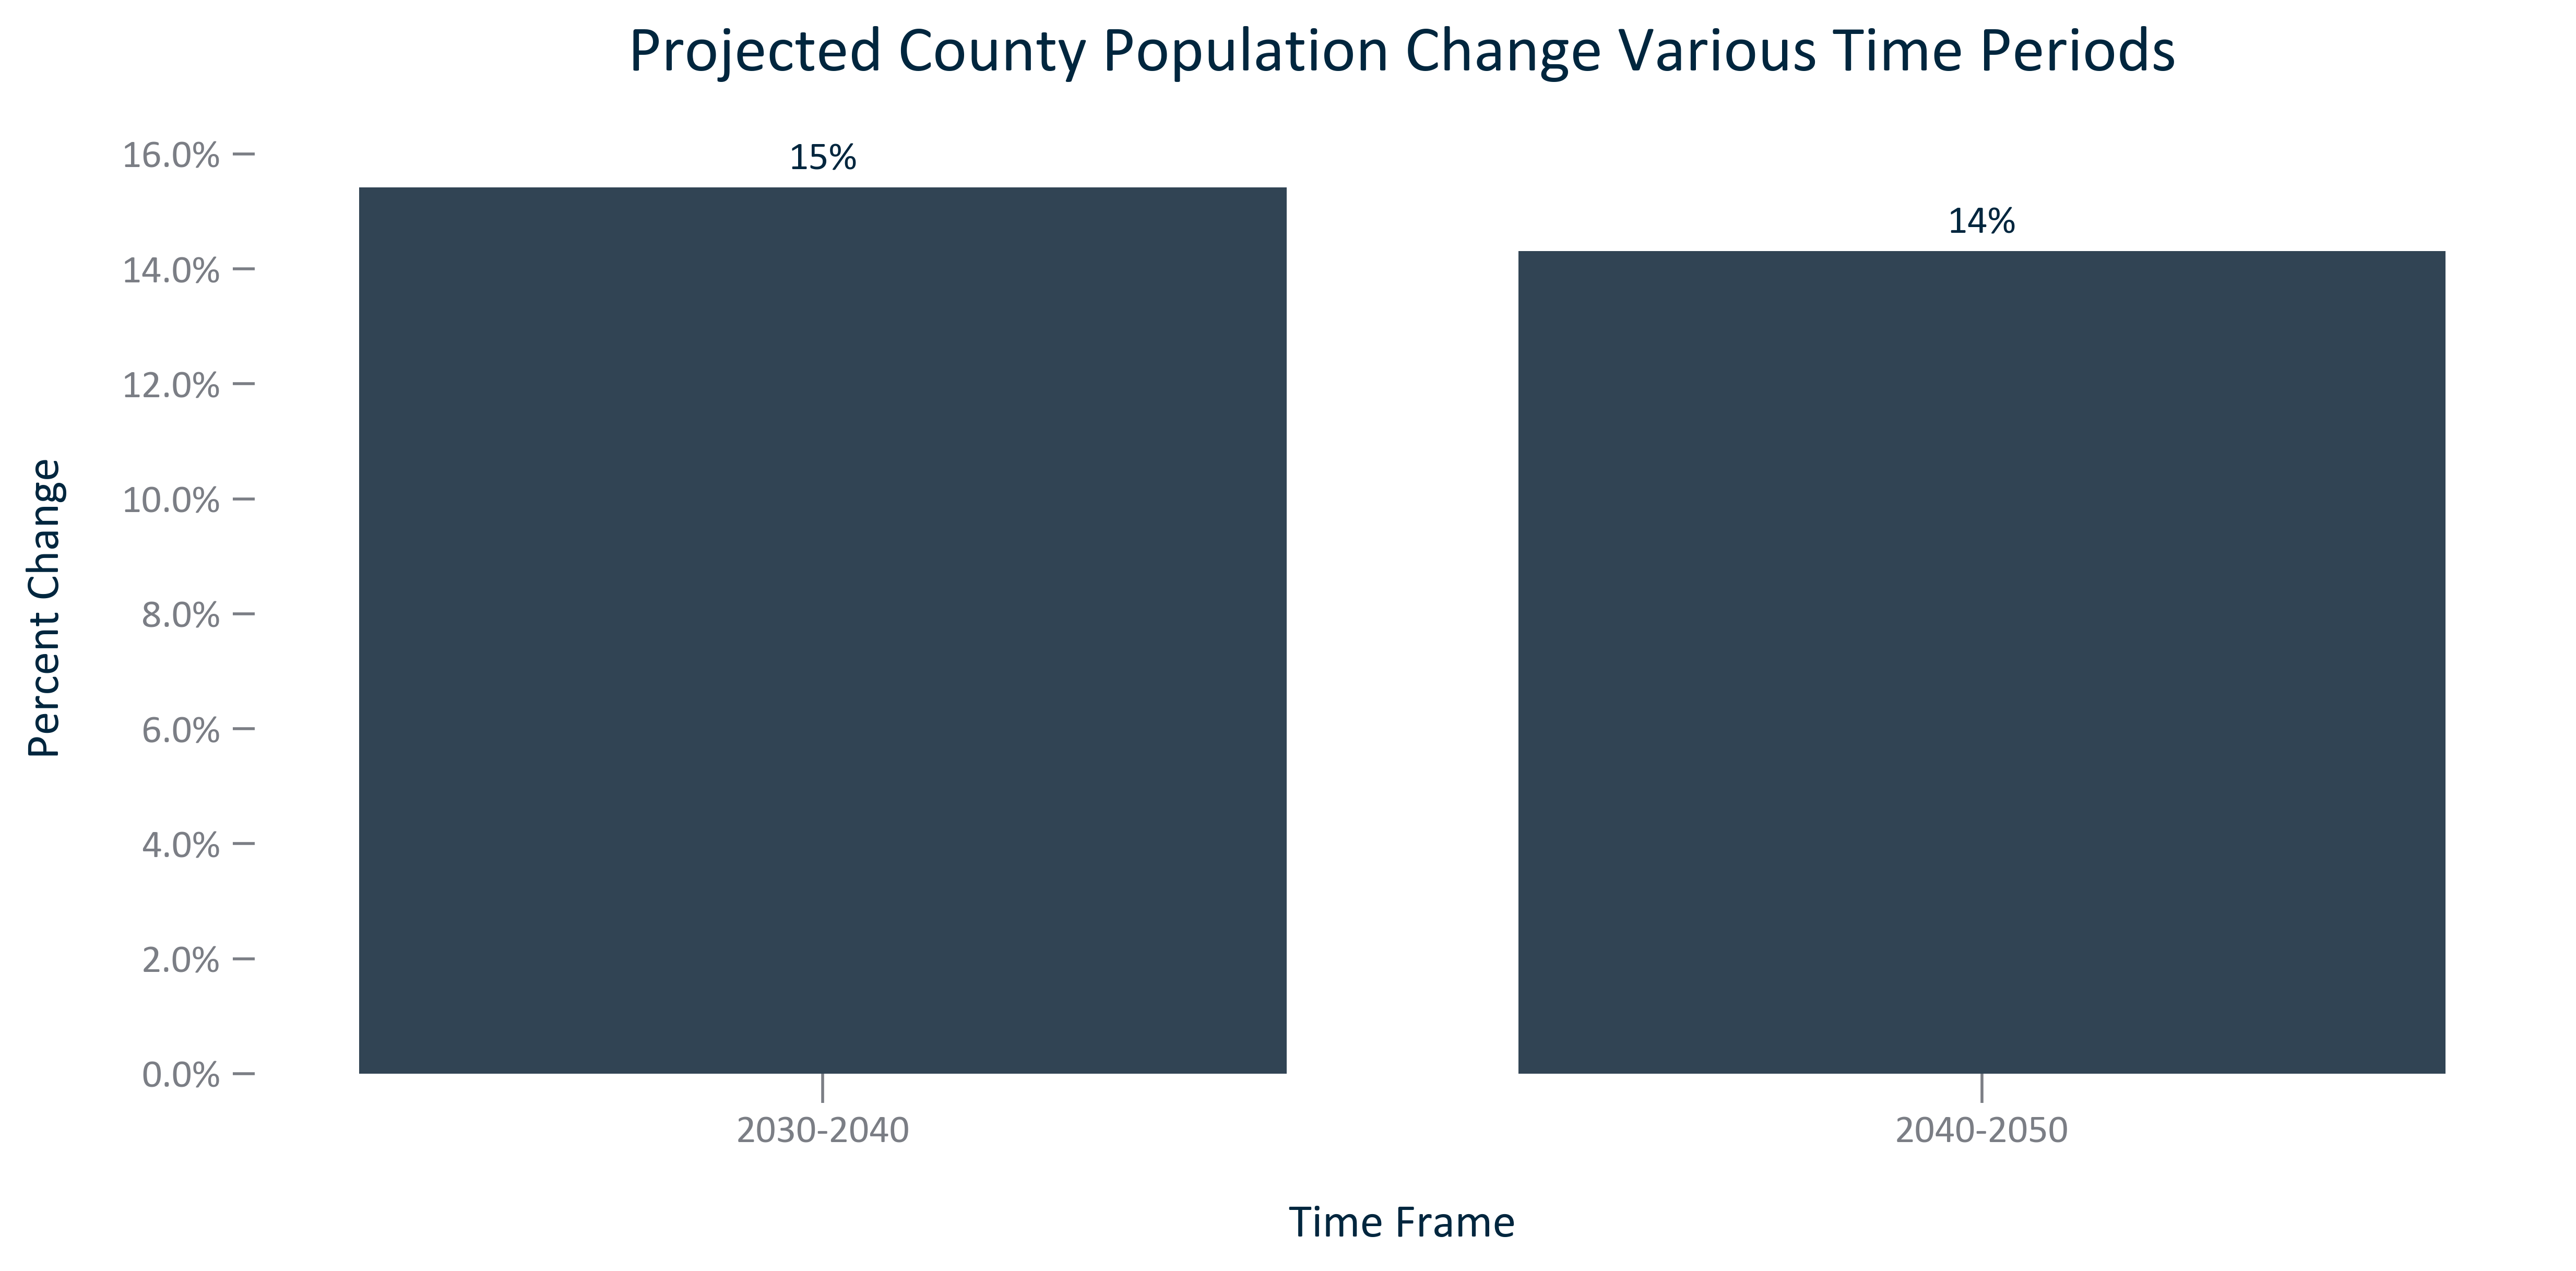

In [114]:
title = 'Projected County Population Change Various Time Periods' #Unincorporated
df_temp = projectedpopandhh.loc[projectedpopandhh['NAME'] == county] #unincorporated
df_temp = df_temp.loc[df_temp['Time Frame'] != 'None']
df_temp = df_temp.loc[(df_temp['Time Frame'] == '2020-2030')|(df_temp['Time Frame'] == '2030-2040')|(df_temp['Time Frame'] == '2040-2050')]
df_temp = df_temp.loc[df_temp['Population % Change'].notnull()]
df_temp = df_temp[['NAME', 'Time Frame', 'Population Change', 'Population % Change']]
xinput = 'Time Frame'
yinput = 'Population % Change'
xlabel = xinput
ylabel = 'Percent Change'
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentformat)) #y axis formatting
#data labels
singledatalabels(0, 5, "{:,.0f}%", n = 1, start_idx = 0)
#display and save
fig.savefig('../Figures/POP_bar_primarygeo_populationprojectionchange_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_bar_primarygeo_populationprojectionchange_overtime.png', bbox_inches='tight')
with open('../Figures/POP_bar_primarygeo_populationprojectionchange_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Woods and Poole Population Projections')
plt.show()
plt.close();

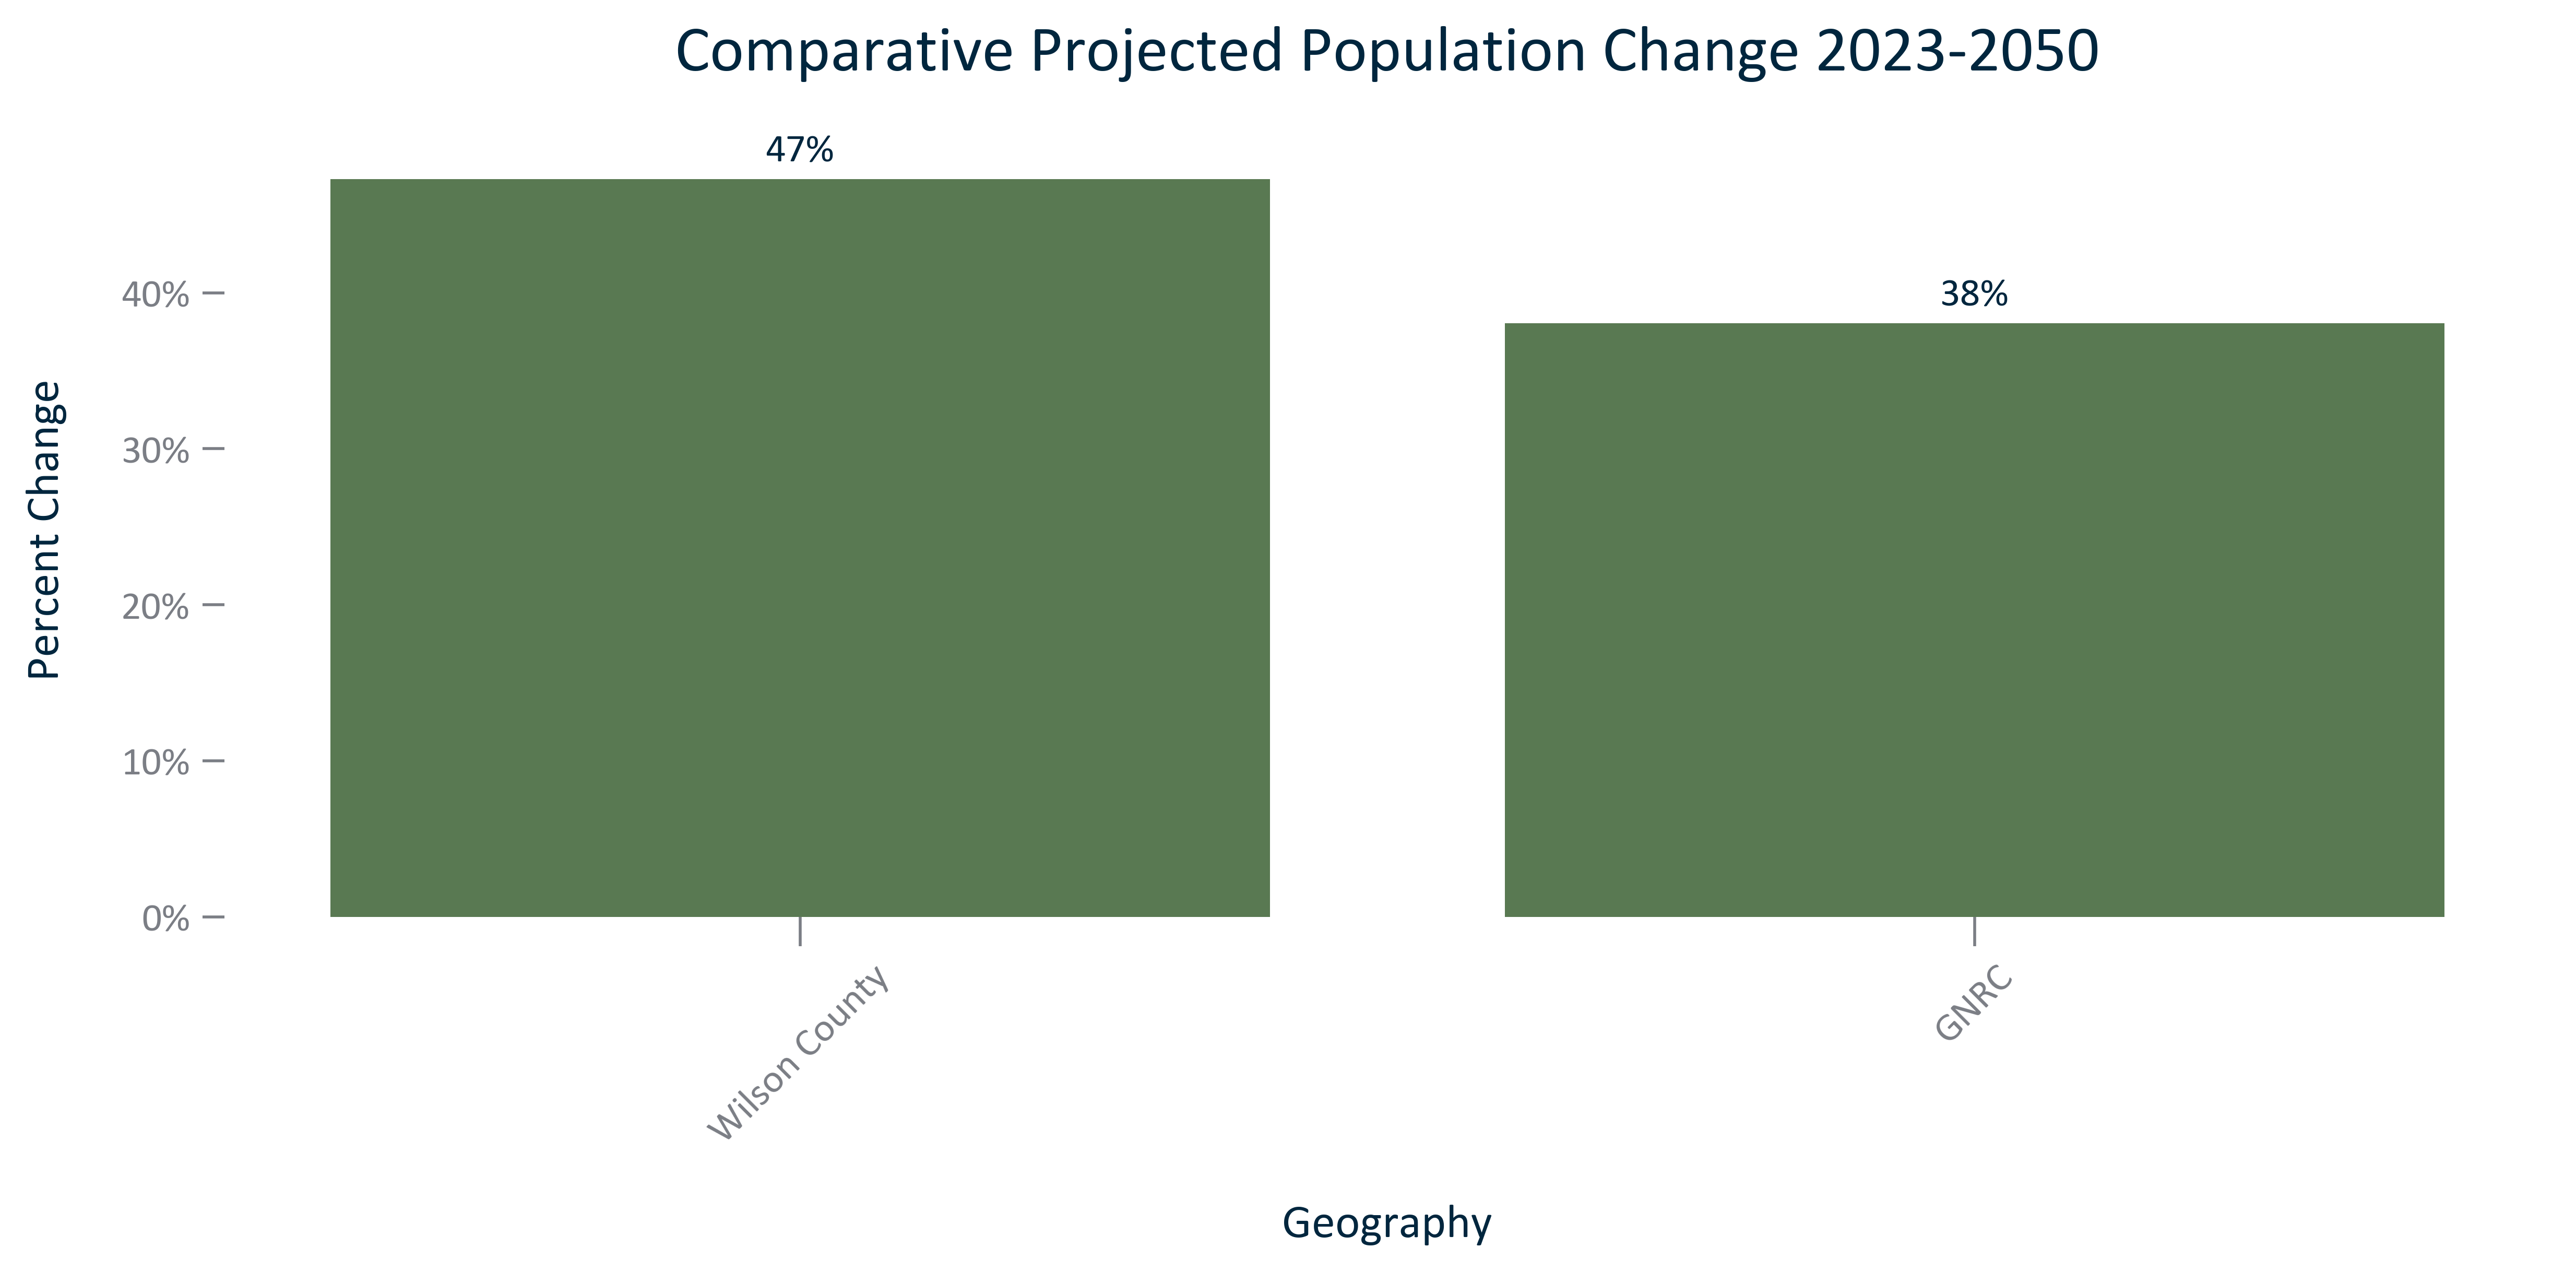

In [115]:
title = 'Comparative Projected Population Change 2023-2050'
#set up temporary dataframe
df_temp = projectedpopandhh.loc[(projectedpopandhh['Time Frame'] == '2023-2050')].sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
#newcols.remove(unincorporated)
newcols.remove(county)
newcols.remove(region)
newcols = [region] + newcols
newcols = [county] + newcols
newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
x = df_temp['NAME']
y = df_temp['Population % Change']
xlabel = 'Geography'
ylabel = 'Percent Change'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != unincorporated else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}%", n = 1, start_idx = 0)
#display and save
fig.savefig('../Figures/POP_bar_geocomparative_populationprojectionchange_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_bar_geocomparative_populationprojectionchange_overtime.png', bbox_inches='tight')
with open('../Figures/POP_bar_geocomparative_populationprojectionchange_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Woods and Poole Population Projections')
plt.show()
plt.close();

In [117]:
#create the wide formatted dataframe
wide = projectedpopandhh.loc[projectedpopandhh['Year'] != 0]
wide['Year'] = wide['Year'].astype(str).str.replace(r'\.0$', '', regex=True)
wide = wide[['NAME', 'Year', 'Population']]
wide = wide.pivot(index = 'NAME', columns = 'Year', values = 'Population')
wide = wide.add_prefix('Population ')
cols = wide.columns
wide[cols] = wide[cols].astype(float)
wide = wide.reset_index(drop = False)
wide.head()

Year,NAME,Population 2023,Population 2024,Population 2025,Population 2026,Population 2027,Population 2028,Population 2029,Population 2030,Population 2031,Population 2032,Population 2033,Population 2034,Population 2035,Population 2036,Population 2037,Population 2038,Population 2039,Population 2040,Population 2041,Population 2042,Population 2043,Population 2044,Population 2045,Population 2046,Population 2047,Population 2048,Population 2049,Population 2050,Population 2051,Population 2052,Population 2053,Population 2054,Population 2055,Population 2056,Population 2057,Population 2058,Population 2059,Population 2060
0,GNRC,2185289.0,2.214626e+06,2.244148e+06,2.273805e+06,2.303554e+06,2.333378e+06,2.363303e+06,2.393338e+06,2.423478e+06,2.453662e+06,2.483922e+06,2.514193e+06,2.544455e+06,2.574663e+06,2.604817e+06,2.634991e+06,2.665217e+06,2.695577e+06,2.726106e+06,2.756857e+06,2.787877e+06,2.819203e+06,2.850905e+06,2.883017e+06,2.915584e+06,2.948686e+06,2.982356e+06,3016629.0,3051654.0,3087362.0,3123780.0,3160941.0,3198914.0,3237708.0,3277351.0,3317859.0,3359253.0,3401533.0
1,Wilson County,163674.0,1.663353e+05,1.690205e+05,1.717238e+05,1.744430e+05,1.771773e+05,1.799266e+05,1.826918e+05,1.854731e+05,1.882653e+05,1.910706e+05,1.938839e+05,1.967021e+05,1.995214e+05,2.023436e+05,2.051719e+05,2.080091e+05,2.108634e+05,2.137347e+05,2.166289e+05,2.195492e+05,2.224984e+05,2.254817e+05,2.285030e+05,2.315632e+05,2.346715e+05,2.378307e+05,241042.0,244399.0,247817.0,251295.0,254838.0,258451.0,262135.0,265892.0,269724.0,273631.0,277614.0


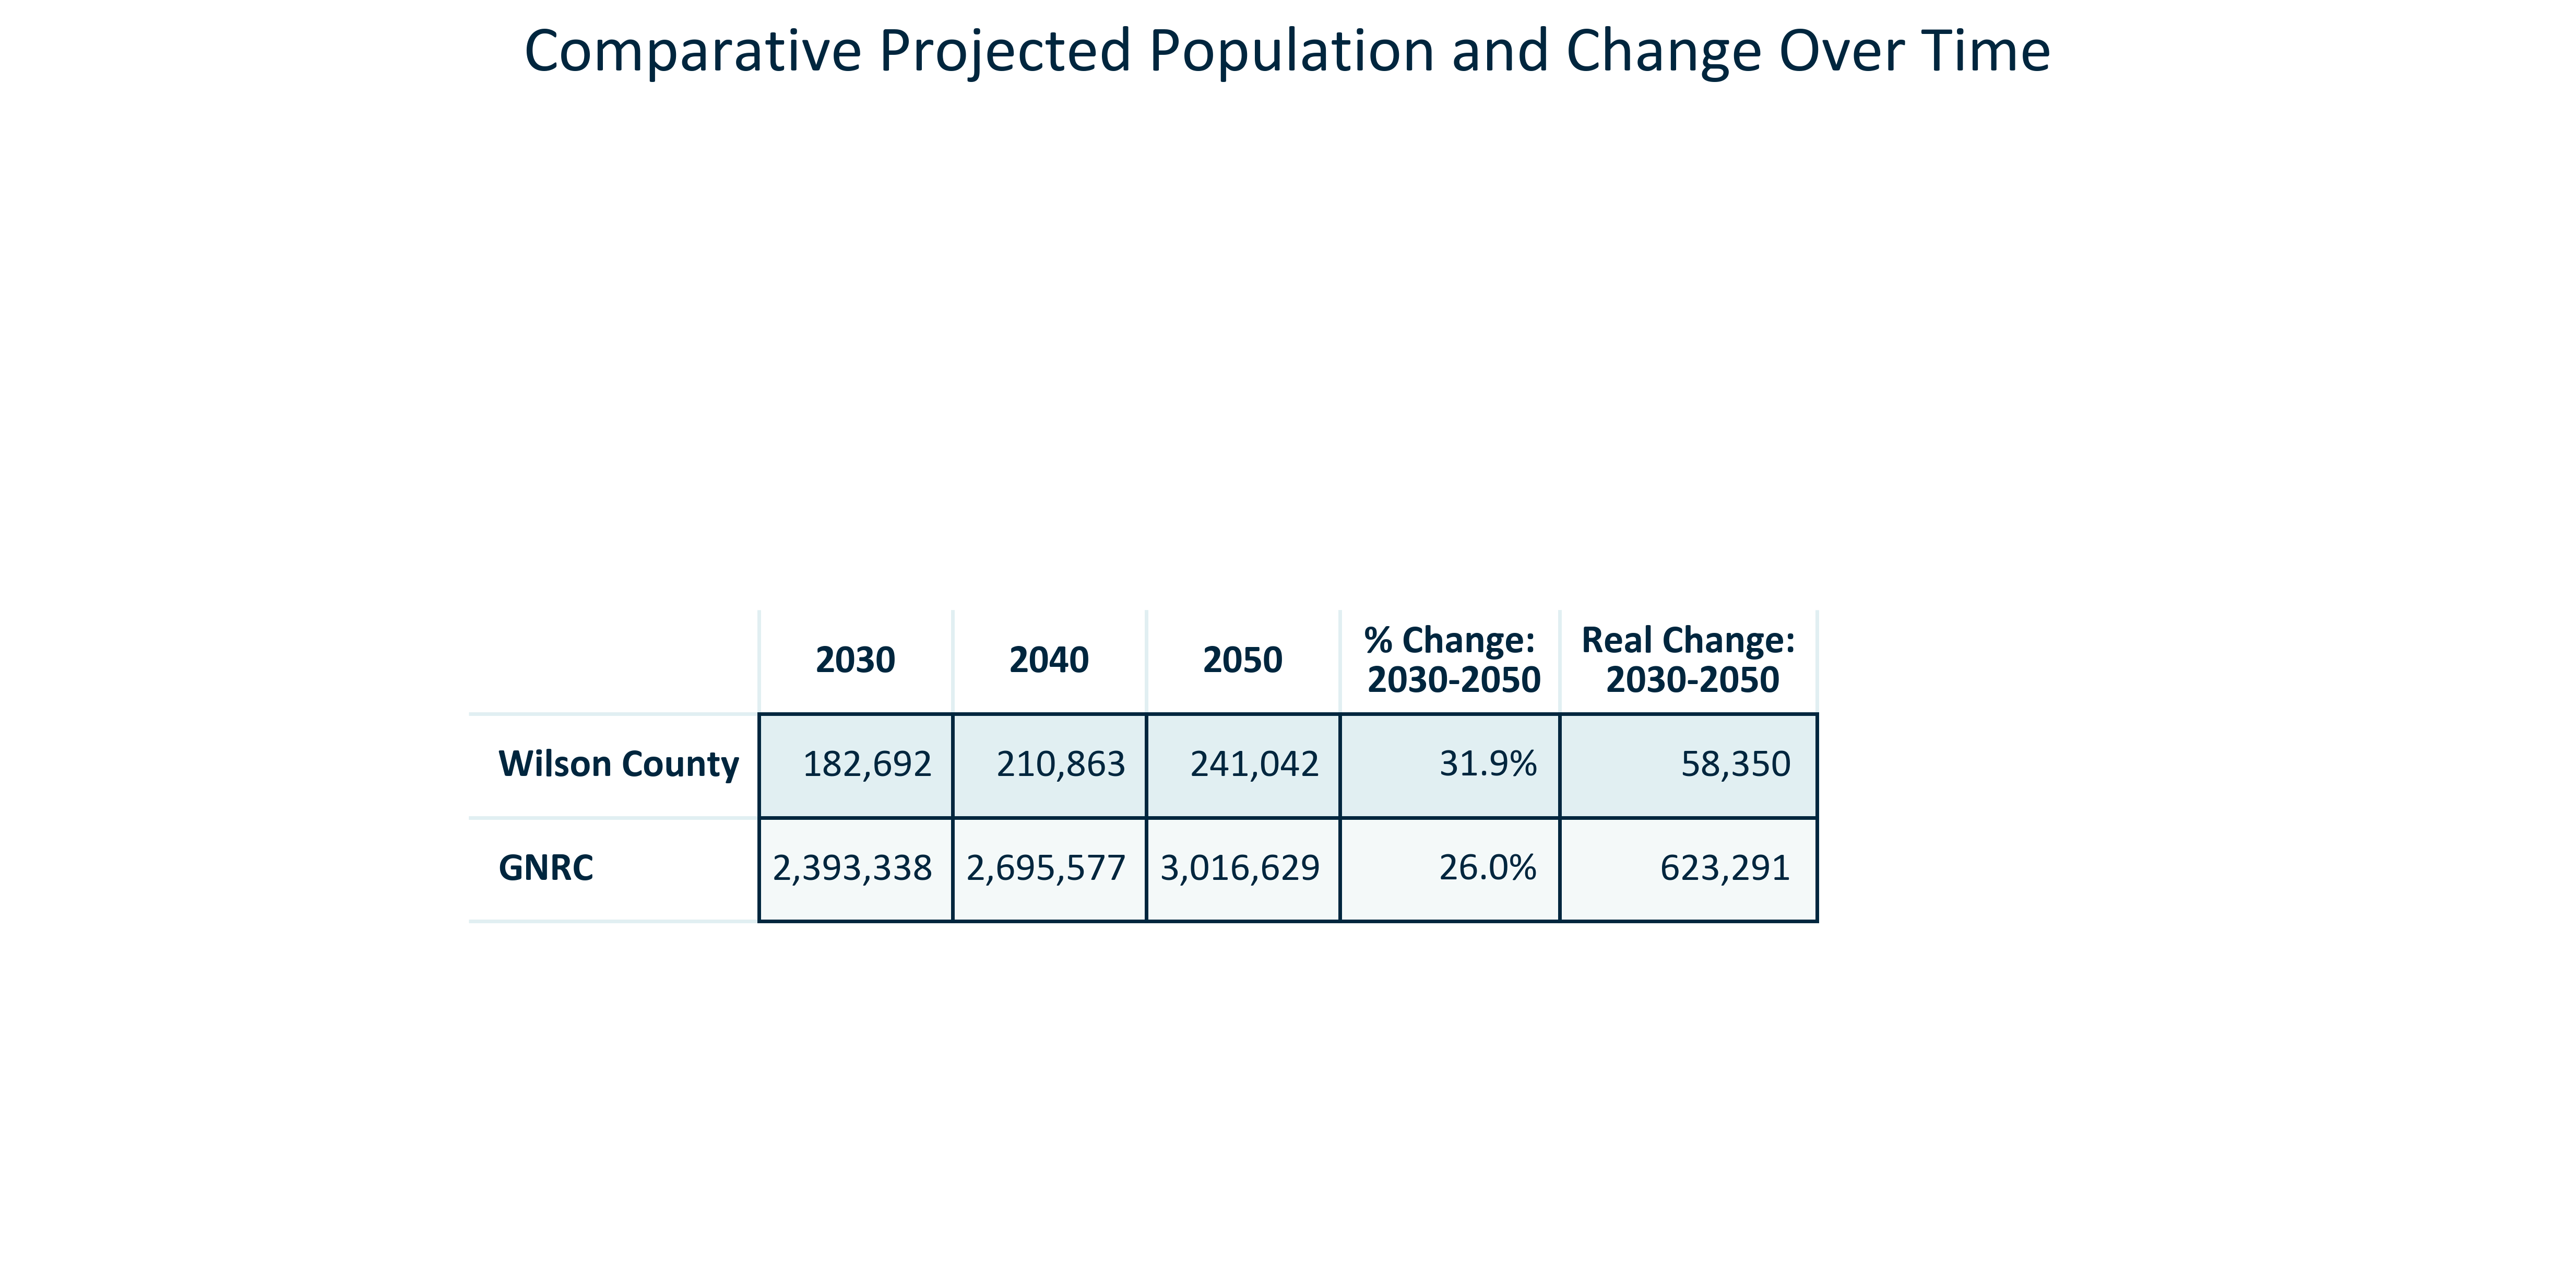

In [118]:
title = 'Comparative Projected Population and Change Over Time'
#set up temporary dataframe
df_temp = wide[['NAME', 'Population 2030', 'Population 2040', 'Population 2050']]
df_temp = df_temp.rename(columns = {'Population 2030': '2030', 'Population 2040': '2040', 'Population 2050': '2050'})
df_temp['% Change:\n 2030-2050'] = prettypercentchange(df_temp['2050'], df_temp['2030'])
df_temp['Real Change:\n 2030-2050'] = df_temp['2050'] - df_temp['2030']
df_temp.update(df_temp[['2030', '2040', '2050', 'Real Change:\n 2030-2050']].applymap('{:,.0f}'.format))
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
#newcols.remove(unincorporated)
newcols.remove(county)
newcols.remove(region)
newcols = [region] + newcols
newcols = [county] + newcols
#newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols)
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
makeinvisible(guy1, guy2, guy3)
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', 
                 cellColours = colours, colColours = colcolours, cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
ax.set_title(label = title, y = 1.15)
row_headers = df_temp.index
column_headers = df_temp.columns
allheaders(col1, col2, edge1, edge2)
table.scale(2, 2.5)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
#display and save
fig.savefig('../Figures/POP_table_geocomparative_populationprojectionandchange_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_table_geocomparative_populationprojectionandchange_overtime.png', bbox_inches='tight')
with open('../Figures/POP_table_geocomparative_populationprojectionandchange_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Woods and Poole Population Projections')
plt.show()
plt.close();